In [8]:
import datacube
dc = datacube.Datacube()

In [9]:
# Declare some 'constants' for the program
#x=(149.07, 149.17)
#y=(-35.25, -35.35) 
start ='1991'
end = '2018'
p = 'LT05_scene'
res = (0.0025, -0.0025)
q = 'quality'
fake_saturation = 30000

In [11]:
rgb = dc.load(product = p
              , time=(start, end)
              , measurements=['red', 'green', 'blue']
              , resolution = res).to_array(dim='color').transpose('time', 'latitude', 'longitude', 'color')
zip(rgb.dims, rgb.shape)

In [12]:
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['latitude', 'longitude'])
scaled = (clipped_visible / max_val)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


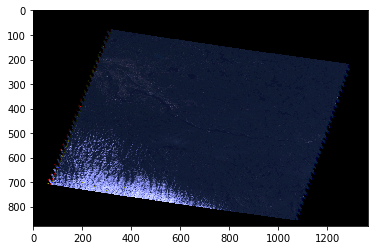

In [13]:
from matplotlib import pyplot as plt
plt.imshow(scaled.isel(time=3))